In [513]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d

pwd = "."

m_Te = 2.1188477e-22 #g
m_O = 2.6566962e-23

m_TeO2 = 159.60 / 6.022e23 #g
p_TeO2 = 6.04 # g cm-3
N_TeO2 = p_TeO2 / m_TeO2

N_Te = N_TeO2
N_O = N_Te * 2

p_O = N_O * m_O
p_Te = N_Te * m_Te

print(p_O)
print(p_Te)

p_Te * 1.227 + p_O * 1.805

1.2109234596372935
4.828859218695238


8.110727105984374

In [514]:
def dEdx_p(file_path, density, show_graph=False):
    with open(file_path) as f:   
            ps = []
            dEdxs = []

            for line in f:
                linedata = line.split()
                
                try:
                    dEdx = float(linedata[7]) * density
                    dEdxs.append(dEdx)
                    
                    p = float(linedata[1])
                    ps.append(p)
                except:
                    #dEdxs.append(np.nan)
                    pass
    
    if show_graph:
        plt.plot(ps, dEdxs,label=file_path)
        plt.xscale('log')
        plt.yscale('log')
        #plt.ylim(1,1e+3)
        #plt.title("Te")
        plt.xlabel("p")
        plt.ylabel("dE/dx")
        plt.legend()
        
    print("dEdx min: " + str(dEdxs[0]))
    print("p min: " + str(ps[0]))
    print()
        
        
    #print(dEdxs[:])
    #print(ps[:])
    #print()
                
    return CubicSpline(ps, dEdxs)

dEdx min: 5.925010261339058
p min: 339.6

dEdx min: 2.185716844645315
p min: 391.7



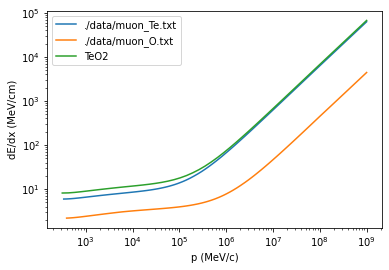

In [521]:
Te_p = dEdx_p(pwd + "/data/muon_Te.txt", p_Te, show_graph=True)
O_p = dEdx_p(pwd + "/data/muon_O.txt", p_O, show_graph=True)

TeO2_p = lambda x: Te_p(x) + O_p(x)

plt.plot(np.logspace(2.5,9), TeO2_p(np.logspace(2.5,9)),label="TeO2")
plt.xscale('log')
plt.yscale('log')
#plt.ylim(1,1e+3)
#plt.title("Te")
plt.xlabel("p (MeV/c)")
plt.ylabel("dE/dx (MeV/cm)")
plt.legend()

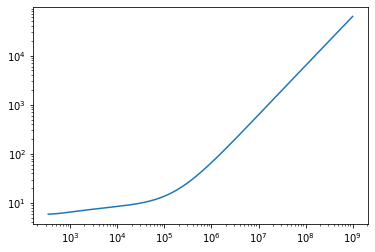

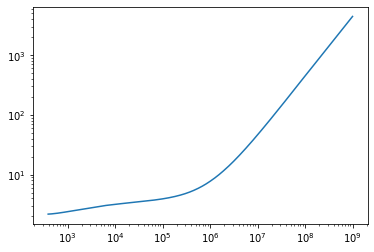

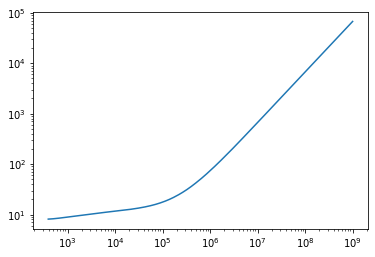

In [498]:
plt.plot(np.logspace(np.log10(339.6),9,1000), Te_p(np.logspace(np.log10(339.6),9,1000)))
plt.xscale("log")
plt.yscale("log")

plt.figure()

plt.plot(np.logspace(np.log10(391.7),9,1000), O_p(np.logspace(np.log10(391.7),9,1000)))
plt.xscale("log")
plt.yscale("log")

plt.figure()

plt.plot(np.logspace(np.log10(391.7),9,1000), TeO2_p(np.logspace(np.log10(391.7),9,1000)))
plt.xscale("log")
plt.yscale("log")

In [505]:
TeO2_p(391.7)

8.134871402077849

In [499]:
def p_dEdx(spline):
    ps = np.logspace(np.log10(391.7),9,1000)
    dEdxs = spline(ps)
    
    return CubicSpline(dEdxs, ps)

In [500]:
TeO2 = p_dEdx(TeO2_p)

Text(0.5, 0, 'dEdx (MeV/cm)')

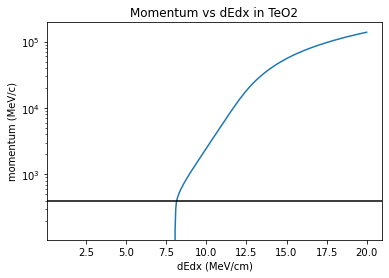

In [504]:
plt.plot(np.linspace(1,20,500), TeO2(np.linspace(1,20,500)))
plt.yscale("log")

plt.axhline(391.7, color='black')

plt.title("Momentum vs dEdx in TeO2")
plt.ylabel("momentum (MeV/c)")
plt.xlabel("dEdx (MeV/cm)")

In [510]:
TeO2(8.2)

array(449.89964321)

Text(0, 0.5, 'Num')

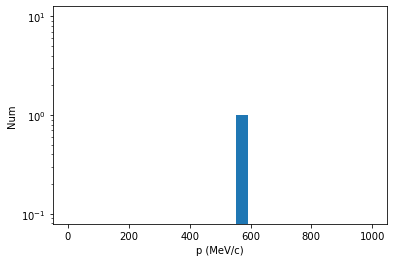

In [507]:
%run DataAnalysis.ipynb
data = DataAnalysis()
data.load_eventdf('data/new_moo/8-3/events.csv')
data.load_clusterdf('data/new_moo/8-3/clusters.csv')

data.filter_fit(3.5,5)

array = plt.hist(TeO2(data.get_clusterdf()['dEdx'].values/100),np.linspace(0,1000), 1000)
plt.yscale('log')
plt.xlabel("p (MeV/c)")
plt.ylabel("Num")

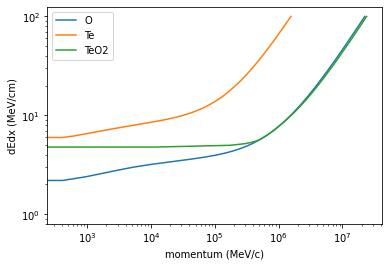

In [472]:
O = p_dEdx(pwd + "/data/muon_O.txt", p_O, show_graph=False)
Te = p_dEdx(pwd + "/data/muon_Te.txt", p_Te, show_graph=False)

plt.plot(O(np.linspace(1,100,500)), np.linspace(1,100,500), label='O')
plt.plot(Te(np.linspace(1,100,500)), np.linspace(1,100,500), label='Te')



plt.plot(TeO2(np.linspace(1,100,500)), np.linspace(1,100,500), label='TeO2')
plt.yscale("log")
plt.xscale("log")

#plt.title("Momentum vs dEdx in TeO2")
plt.xlabel("momentum (MeV/c)")
plt.ylabel("dEdx (MeV/cm)")

plt.legend()

In [259]:
TeO2()

20269233.459176645